# Machine Learning - Regression Models

## Regression

Model yang menghasilkan angka daripada kelas/kategori.

Formula : $Y = mx + b$

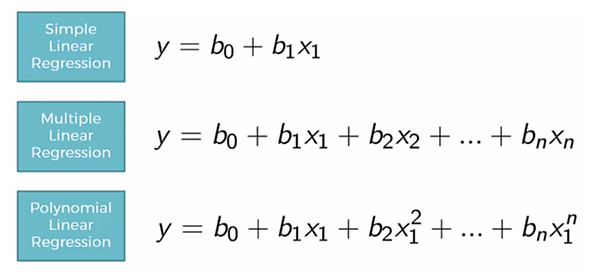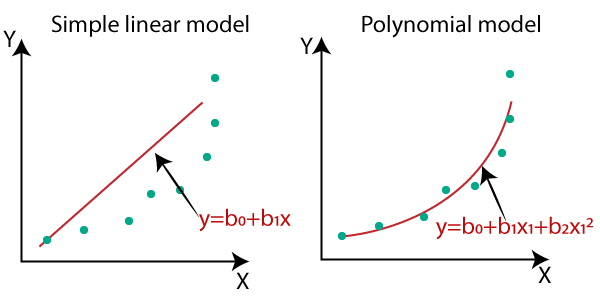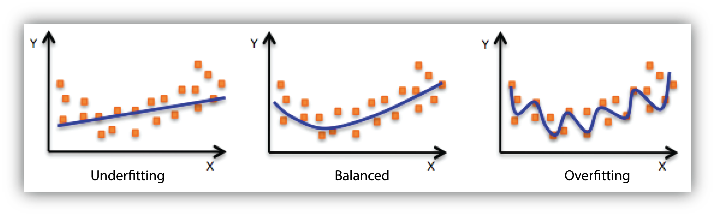

- Metric pada Data Training Jauh Lebih Baik dibandingkan pada testing (Overfitting)
- Metric pada Data Training Jauh Lebih Buruk dibandingkan pada testing (Underfitting)
- Metric pada Data Training Sama baiknya dibandingkan data testing (Well-Fit)

## Install Packages & Libraries

In [6]:
#!pip install scikit-learn statsmodels

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
%matplotlib inline

### Simple Linear Regression

In [9]:
x = np.array([5,15,25,35,45,55]).reshape((-1,1))
y = np.array([5,20,14,32,22,38])
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [10]:
model = LinearRegression()

In [11]:
model.fit(x,y)

LinearRegression()

In [12]:
# Intercept and Slope

print('intercept:',model.intercept_)
print('slope:',model.coef_)

intercept: 5.633333333333329
slope: [0.54]


In [13]:
# Model

print('Model: y = ',model.coef_[0],'x +',model.intercept_)

Model: y =  0.54 x + 5.633333333333329


In [14]:
# Prediction

y_pred = model.predict(x)
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [15]:
#R-Squared

r_sq = model.score(x,y)
r_sq

0.7158756137479542

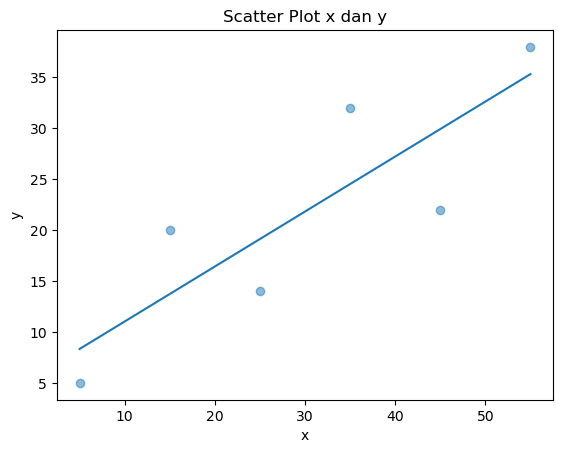

In [16]:
#Scatter Plot

plt.scatter(x,y,alpha=0.5)
plt.plot(x,y_pred)

plt.title('Scatter Plot x dan y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
x_new = np.arange(5,20,5).reshape([-1,1])
x_new

array([[ 5],
       [10],
       [15]])

In [18]:
y_new_pred = model.predict(x_new)
y_new_pred

array([ 8.33333333, 11.03333333, 13.73333333])

### Multiple Linear Regression

In [19]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

print(x,'\n',y)

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]] 
 [ 4  5 20 14 32 22 38 43]


In [20]:
model = LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression()

In [22]:
# Slope

model.coef_

array([0.44706965, 0.25502548])

In [23]:
# Intercept

model.intercept_

5.522579275198183

In [24]:
# Model

print('Model: y=',model.coef_[0],'x1 +',model.coef_[1],'x2 +',model.intercept_)

Model: y= 0.4470696489241224 x1 + 0.2550254813137035 x2 + 5.522579275198183


In [25]:
# Prediction

y_pred_multi = model.predict(x)
y_pred_multi

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [26]:
# R-Squared

r_sq_multi = model.score(x,y)
r_sq_multi

0.8615939258756776

In [27]:
# Import Library for MSE & MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [28]:
# MSE >> Mean Squared Error

mse_multi = mean_squared_error(y, y_pred_multi)
mse_multi

25.56187181483579

In [29]:
# RMSE

rmse = (mse_multi)**0.5
rmse

5.055874980142981

### Polynomial Regression

In [30]:
# Import Library

from sklearn.preprocessing import PolynomialFeatures

In [31]:
x = np.array([5,15,25,35,45,55]).reshape([-1,1])
y = np.array([15,11,2,8,25,32])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


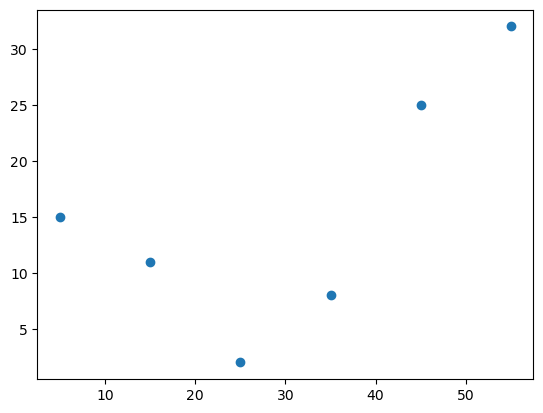

In [32]:
# Cek Scatter Plot

plt.scatter(x,y)

In [33]:
model = LinearRegression()

In [34]:
model.fit(x,y)
y_pred = model.predict(x)

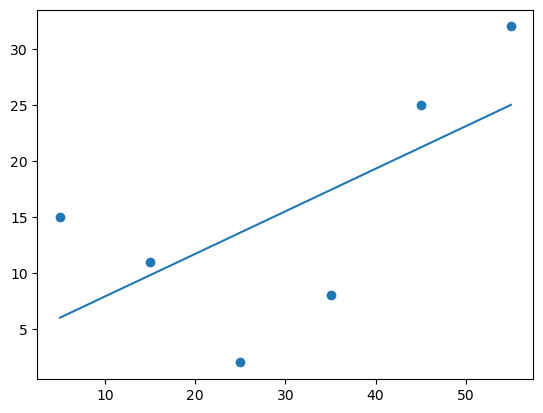

In [35]:
# Scatter Plot

plt.scatter(x,y)
plt.plot(x,y_pred)

Plot menggunakan linear regression >> kurang tepat.

In [36]:
model.score(x,y)

0.4065969428801287

Nilai R-Squared kecil, model kurang tepat.

Dilakukan transformasi pada data.

In [37]:
transformer = PolynomialFeatures(include_bias=False)

In [38]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [39]:
x_poly = transformer.transform(x)
x_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [40]:
x_poly = transformer.fit_transform(x)
x_poly

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [41]:
model_poly = LinearRegression()
model_poly.fit(x_poly,y)

LinearRegression()

In [42]:
# Prediction

y_poly_pred = model_poly.predict(x_poly)
y_poly_pred

array([15.46428571,  7.90714286,  6.02857143,  9.82857143, 19.30714286,
       34.46428571])

In [43]:
# R-Squared

model_poly.score(x_poly,y)

0.8908516262498563

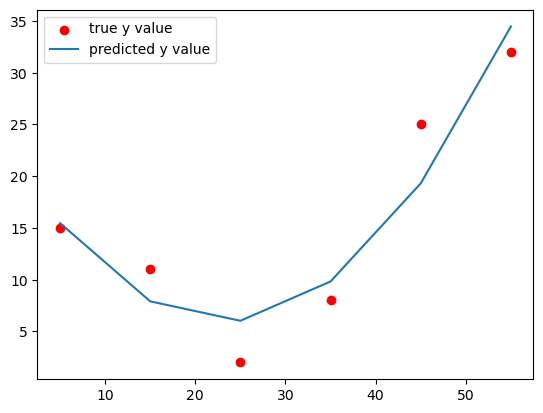

In [44]:
# Scatter Plot

plt.scatter(x,y,color='red',label='true y value')
plt.plot(x,y_poly_pred,label='predicted y value')
plt.legend()
plt.show()

## Multiple Polynomial Regression

In [90]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [91]:
x_poly = transformer.fit_transform(x)
model_poly = LinearRegression()
model = LinearRegression()
model_poly.fit(x_poly,y)
model.fit(x,y)

LinearRegression()

In [92]:
print(model.score(x,y),model_poly.score(x_poly,y))

0.8615939258756776 0.9453701449127823


In [93]:
x_0 = [i[0] for i in x]

In [94]:
x_1 = [i[1] for i in x]

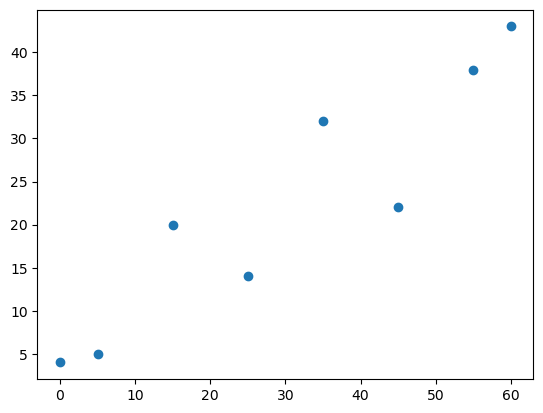

In [95]:
plt.scatter(x_0,y)

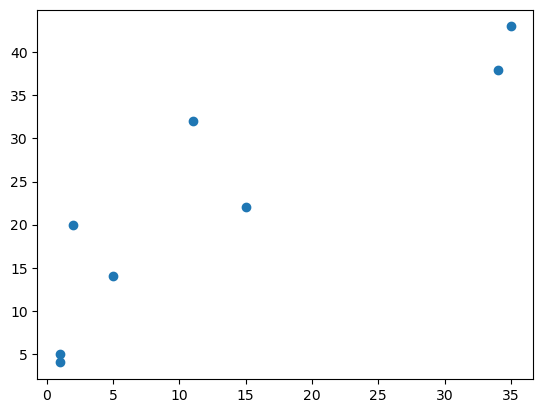

In [96]:
plt.scatter(x_1,y)

In [97]:
y_pred = model.predict(x)
y_pred_poly = model_poly.predict(x_poly)
mse  = mean_squared_error(y,y_pred)
mse_poly = mean_squared_error(y,y_pred_poly)
rmse = np.sqrt(mse)
rmse_poly = np.sqrt(mse_poly)
print('nilai rmse:',rmse)
print('nilai rmse polinomial:',rmse_poly)

nilai rmse: 5.055874980142981
nilai rmse polinomial: 3.1763896740514275


## Advanced Linear Regression with Statsmodels

In [53]:
# Import Library

import statsmodels.api as sm

In [54]:
x = np.array([[0,1],
             [5,1],
             [15,2],
             [25,5],
             [35,11],
             [45,15],
             [55,34],
             [60,35]])
y = np.array([4,5,20,14,32,22,38,43])

In [55]:
x = sm.add_constant(x)

In [56]:
x

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 15.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [57]:
model_stat = sm.OLS(y,x)
result = model_stat.fit()

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00713
Time:                        14:26:58   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.2

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [59]:
print('rquared:',result.rsquared)

rquared: 0.8615939258756776


In [98]:
# Transform to DF

res_summary = result.summary()
res_summary

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     15.56
Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00713
Time:                        14:29:18   Log-Likelihood:                -24.316
No. Observations:                   8   AIC:                             54.63
Df Residuals:                       5   BIC:                             54.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5226      4.431      1.246      0.268      -5.867      16.912
x1             0.4471      0.285      1.567      0.178      -0.286       1.180
x2             0.2550      0.453      0.563      0.598      -0.910       1.420
==============================================================================
Omnibus:                        0.561   Durbin-Watson:                   3.268
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.534
Skew:                           0.380   Prob(JB):                        0.766
Kurtosis:                       1.987   Cond. No.                         80.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
res_summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.5226,4.431,1.246,0.268,-5.867,16.912
x1,0.4471,0.285,1.567,0.178,-0.286,1.180
x2,0.2550,0.453,0.563,0.598,-0.910,1.420


In [62]:
res_summary.tables[0]

Dep. Variable:,y,R-squared:,0.862
Model:,OLS,Adj. R-squared:,0.806
Method:,Least Squares,F-statistic:,15.56
Date:,"Fri, 31 Mar 2023",Prob (F-statistic):,0.00713
Time:,14:26:58,Log-Likelihood:,-24.316
No. Observations:,8,AIC:,54.63
Df Residuals:,5,BIC:,54.87
Df Model:,2,,
Covariance Type:,nonrobust,,


In [63]:
# Prediction

y_pred = result.predict(x)
y_pred

array([ 5.77760476,  8.012953  , 12.73867497, 17.9744479 , 23.97529728,
       29.4660957 , 38.78227633, 41.27265006])

In [64]:
# MSE & RMSE

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
print('nilai mse:',mse)
print('nilai rmse:',rmse)

nilai mse: 25.561871814835786
nilai rmse: 5.055874980142981


## Implementing to Datasets

In [65]:
from sklearn import datasets
import pandas as pd

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [67]:
x = df.drop('medv',axis=1)
y = df['medv']

In [68]:
# Regression Summary

x = x[['rm']]
model = sm.OLS(y,x)
results = model.fit()
predictions = results.predict(x)
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   medv   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              4615.
Date:                Fri, 31 Mar 2023   Prob (F-statistic):                   3.74e-256
Time:                        14:26:59   Log-Likelihood:                         -1747.1
No. Observations:                 506   AIC:                                      3496.
Df Residuals:                     505   BIC:                                      3500.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

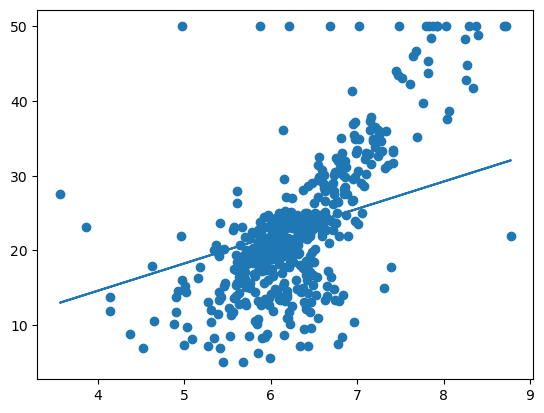

In [69]:
# Scatter Plot

plt.scatter(x,y)
plt.plot(x,predictions)

## Implementing using SKLEARN

### Boston Dataset

In [70]:
X = df.drop('medv',1)
y = df['medv']

C:\Users\USER\AppData\Local\Temp\ipykernel_2860\3720231293.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('medv',1)


In [71]:
linreg = LinearRegression()

In [72]:
linreg.fit(X,y)

LinearRegression()

In [73]:
# Prediction

y_pred = linreg.predict(X)
y_pred

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [74]:
# R-Squared

linreg.score(X,y)

0.7406426641094095

### Car Price Dataset

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/mahatosourav91/Linear-Regression/master/CarPrice_Assignment.csv',usecols=['horsepower','price'])

In [76]:
df

,horsepower,price
0,111,13495.0
1,111,16500.0
2,154,16500.0
3,102,13950.0
4,115,17450.0
...,...,...
200,114,16845.0
201,160,19045.0
202,134,21485.0
203,106,22470.0


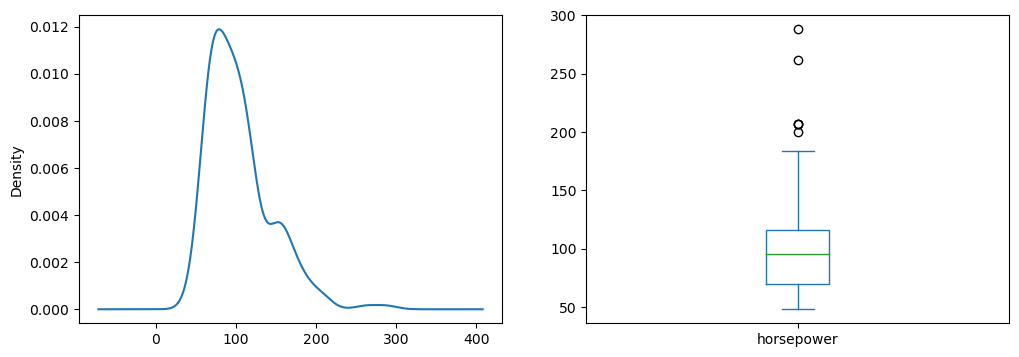

In [77]:
# Data Plot

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')

f.add_subplot(1,2,2)
df['horsepower'].plot(kind='box')

plt.show()

Text(0.5, 0, 'horsepower')

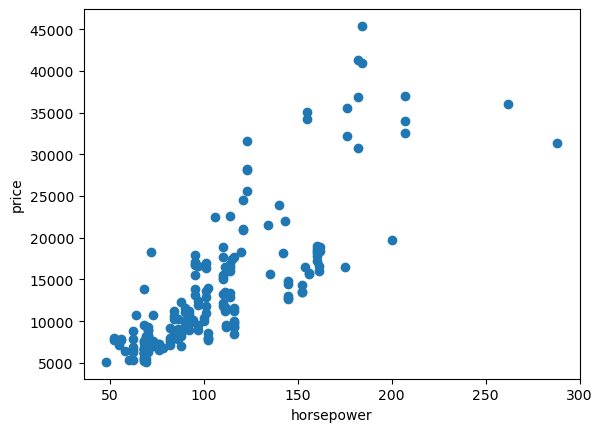

In [78]:
# Scatter Plot

X = df['horsepower']
y = df['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('horsepower')

In [79]:
# Correlation

df.corr()

,horsepower,price
horsepower,1.000000,0.808139
price,0.808139,1.000000


In [80]:
X = X.to_frame()

## Data Splitting

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [83]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [84]:
# Prediction

y_pred = linreg.predict(X_test)
y_pred

array([ 7454.19657709,  7286.48866896,  8125.0282096 , 11814.60218841,
       10305.23101526, 15336.4682591 , 10640.64683152, 23051.03203298,
       12988.55754531,  7621.90448522,  7286.48866896,  8628.15193399,
       23051.03203298, 10976.06264778,  7621.90448522,  7286.48866896,
       15001.05244284, 20199.99759481, 12820.84963718, 12150.01800467,
        7286.48866896, 16510.42361599, 19696.87387042, 22883.32412485,
        7454.19657709, 22715.61621672, 10137.52310714, 15001.05244284,
        5273.99377143,  3932.33050641, 10640.64683152, 13659.38917782,
       16175.00779974, 14665.63662659, 11311.47846403,  7286.48866896,
        5106.2858633 ,  7286.48866896,  7454.19657709, 11814.60218841,
       22715.61621672])

In [85]:
#R-Squared

linreg.score(X_train,y_train)

0.6673606468820089

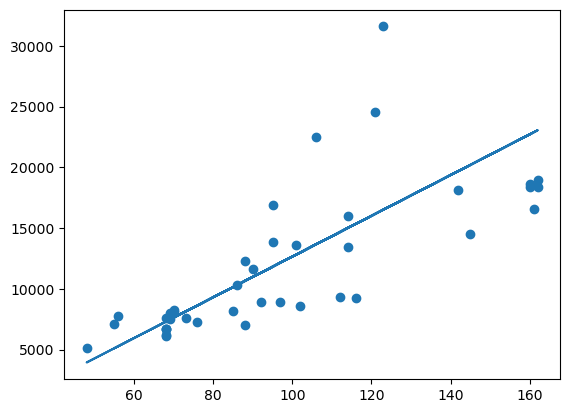

In [86]:
# Scatter Plot

plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)

In [87]:
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

In [88]:
mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)
rmse_tr = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('train mse:',mse_train)
print('test mse',mse_test)
print('train rmse',rmse_tr)
print('test rmse',rmse_test)

train mse: 23326547.26413845
test mse 17032453.460891955
train rmse 4829.756439422018
test rmse 4127.039309346587
